<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ex.1." data-toc-modified-id="Ex.1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ex.1.</a></span></li><li><span><a href="#Ex.3." data-toc-modified-id="Ex.3.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ex.3.</a></span></li><li><span><a href="#Ex.2." data-toc-modified-id="Ex.2.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ex.2.</a></span></li></ul></div>

## Ex.1.

In [7]:
import nltk
from nltk.corpus import gutenberg

In [8]:
thebible = gutenberg.words('bible-kjv.txt')

In [9]:
thebible[:100]

['[',
 'The',
 'King',
 'James',
 'Bible',
 ']',
 'The',
 'Old',
 'Testament',
 'of',
 'the',
 'King',
 'James',
 'Bible',
 'The',
 'First',
 'Book',
 'of',
 'Moses',
 ':',
 'Called',
 'Genesis',
 '1',
 ':',
 '1',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.',
 '1',
 ':',
 '2',
 'And',
 'the',
 'earth',
 'was',
 'without',
 'form',
 ',',
 'and',
 'void',
 ';',
 'and',
 'darkness',
 'was',
 'upon',
 'the',
 'face',
 'of',
 'the',
 'deep',
 '.',
 'And',
 'the',
 'Spirit',
 'of',
 'God',
 'moved',
 'upon',
 'the',
 'face',
 'of',
 'the',
 'waters',
 '.',
 '1',
 ':',
 '3',
 'And',
 'God',
 'said',
 ',',
 'Let',
 'there',
 'be',
 'light',
 ':',
 'and',
 'there',
 'was',
 'light',
 '.',
 '1',
 ':',
 '4',
 'And',
 'God',
 'saw',
 'the',
 'light',
 ',',
 'that',
 'it']

In [23]:
bible_text = nltk.Text(thebible)

In [15]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

bigrams = nltk.bigrams(thebible)
cfd = nltk.ConditionalFreqDist(bigrams)

In [26]:
bible_text.generate(50)

Building ngram index...


lambs , and cast the salt sea , and Habor , and Eshean , 15 : 16
Hamath , Berothah , Sibraim , which were in Eshtemoa , with the sword
be doubled the third hour of the sons of Pashur , a goodly : and I
punished them :


'lambs , and cast the salt sea , and Habor , and Eshean , 15 : 16\nHamath , Berothah , Sibraim , which were in Eshtemoa , with the sword\nbe doubled the third hour of the sons of Pashur , a goodly : and I\npunished them :'

In [19]:
generate_model(cfd,'light')

light , and the LORD , and the LORD , and the LORD , and 

In [20]:
generate_model(cfd,'god')

god , and the LORD , and the LORD , and the LORD , and 

In [22]:
generate_model(cfd,'life')

life , and the LORD , and the LORD , and the LORD , and 

## Ex.3.

In [32]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [39]:
len(brown.words(fileids=['cd12']))
brown.sents(categories=['religion'])

[['As', 'a', 'result', ',', 'although', 'we', 'still', 'make', 'use', 'of', 'this', 'distinction', ',', 'there', 'is', 'much', 'confusion', 'as', 'to', 'the', 'meaning', 'of', 'the', 'basic', 'terms', 'employed', '.'], ['Just', 'what', 'is', 'meant', 'by', '``', 'spirit', "''", 'and', 'by', '``', 'matter', "''", '?', '?'], ...]

In [35]:
brown.words(fileids=['cp12'])
len(brown.words(fileids=['cp12']))

2463

In [42]:
brown_rel_tagged = brown.tagged_words(categories=['religion'])
len(brown_rel_tagged)

39399

In [44]:
brown_rel_tagged[:10]

[('As', 'CS'),
 ('a', 'AT'),
 ('result', 'NN'),
 (',', ','),
 ('although', 'CS'),
 ('we', 'PPSS'),
 ('still', 'RB'),
 ('make', 'VB'),
 ('use', 'NN'),
 ('of', 'IN')]

In [43]:
brown_rom_tagged = brown.tagged_words(categories=['romance'])
len(brown_rom_tagged)

70022

In [47]:
rel_words = [word for (word, tag) in brown_rel_tagged]
rom_words = [word for (word, tag) in brown_rom_tagged]
print(len(set(rel_words))) 
print(len(set(rom_words))) 

6373
8452


In [48]:
def polysemy(word): 
    return wn.synsets(word)

In [54]:
from nltk.corpus import wordnet as wn
import numpy as np

In [52]:
len(wn.synsets('dog', 'n'))

7

In [65]:
meanings_rom_nouns = [len(wn.synsets(w, 'n'))for w in set(rom_words)]
meanings_rel_nouns = [len(wn.synsets(w, 'n'))for w in set(rel_words)]

meanings_rom_all = [len(wn.synsets(w))for w in set(rom_words)]
meanings_rel_all = [len(wn.synsets(w))for w in set(rel_words)]

In [66]:
print(np.mean(meanings_rom_nouns))
print(np.mean(meanings_rel_nouns))

1.9813061997160435
2.1584810921073276


In [67]:
print(np.mean(meanings_rom_all))
print(np.mean(meanings_rel_all))

5.352224325603408
5.576965322454103


In [116]:
import matplotlib.pyplot as plt

(array([6.588e+03, 1.275e+03, 3.690e+02, 9.600e+01, 6.000e+01, 3.500e+01,
        2.100e+01, 2.000e+00, 2.000e+00, 4.000e+00]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

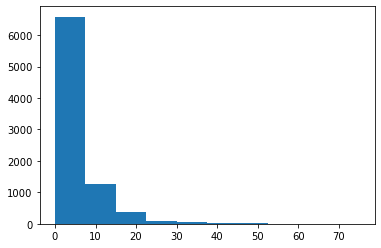

In [127]:
plt.hist(meanings_rom_all, bins = 10)

(array([4.958e+03, 9.390e+02, 2.980e+02, 7.300e+01, 4.600e+01, 3.200e+01,
        2.100e+01, 2.000e+00, 2.000e+00, 2.000e+00]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

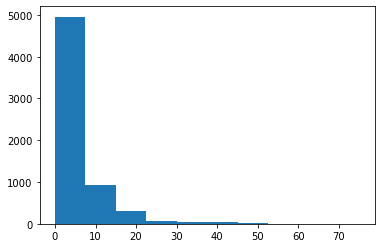

In [123]:
plt.hist(meanings_rel_all, bins = 10)

(array([4.978e+03, 8.490e+02, 3.160e+02, 1.650e+02, 3.900e+01, 1.500e+01,
        5.000e+00, 2.000e+00, 0.000e+00, 4.000e+00]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

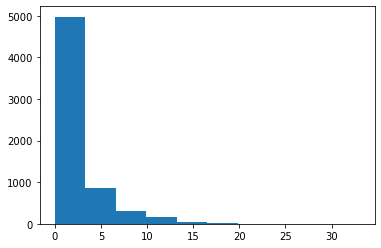

In [122]:
plt.hist(meanings_rel_nouns, bins = 10)

(array([6.766e+03, 1.029e+03, 3.990e+02, 1.920e+02, 4.200e+01, 1.100e+01,
        6.000e+00, 2.000e+00, 0.000e+00, 5.000e+00]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

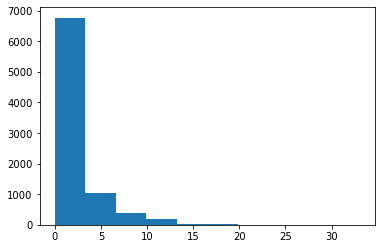

In [121]:
plt.hist(meanings_rom_nouns, bins = 10)

## Ex.2.

In [103]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [111]:
def count_meronyms(word):
    counter = 0
    for synset in wn.synsets(word, wn.NOUN):
        counter += len(synset.part_meronyms()) 
        counter += len(synset.substance_meronyms()) 
    return counter

In [115]:
rel_meronyms = [count_meronyms(lemmatizer.lemmatize(w)) for w in set(rel_words)]
print("Avg. number of meronyms:\n",np.mean(rel_meronyms))
print("Religion:\n",len(set(rel_words)),"---> number of meronyms: ", np.sum(rel_meronyms))

Avg. number of meronyms:
 0.5135728856111721
Religion:
 6373 ---> number of meronyms:  3273


In [114]:
rom_meronyms = [count_meronyms(lemmatizer.lemmatize(w)) for w in set(rom_words)]
print("Avg. number of meronyms:\n", np.mean(rom_meronyms))
print("Romance\n",len(set(rom_words)),"---> number of meronyms: ", np.sum(rom_meronyms))

Avg. number of meronyms:
 0.6250591575958353
Romance
 8452 ---> number of meronyms:  5283
